#  Car Price Prediction 

In [1]:
##Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Step-1: Data Understanding and routine check

In [2]:
CarData = pd.read_excel('CarDataset.xlsx')
CarData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
rows , columns  = CarData.shape

print(f'Number of rows :{rows}\nNumber of Columns :{columns}')

Number of rows :8128
Number of Columns :12


Our Target variable here is selling_price

## Step-2: Data Cleaning & EDA

In [29]:
CarData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [8]:
CarData.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

__Checking Missing Values__

In [10]:
CarData.isnull()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
(CarData.isnull().sum()/len(CarData))*100

name                  0.000000
year                  0.000000
selling_price         0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    2.718996
engine                2.718996
max_power             2.645177
seats                 2.718996
dtype: float64

### We have few missing values in Mileage, engine, max_power, seats columns

In [12]:
CarData['max_power'] = CarData['max_power'].replace({" ": np.NaN})

Dropping Missing values

In [14]:
CarData.dropna(inplace=True)

In [15]:
(CarData.isnull().sum()/len(CarData))*100

name                  0.0
year                  0.0
selling_price         0.0
km_driven             0.0
fuel                  0.0
seller_type           0.0
transmission          0.0
owner                 0.0
mileage(km/ltr/kg)    0.0
engine                0.0
max_power             0.0
seats                 0.0
dtype: float64

In [16]:
CarData.shape

(7906, 12)

In [17]:
CarData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7906 non-null   object 
 1   year                7906 non-null   int64  
 2   selling_price       7906 non-null   int64  
 3   km_driven           7906 non-null   int64  
 4   fuel                7906 non-null   object 
 5   seller_type         7906 non-null   object 
 6   transmission        7906 non-null   object 
 7   owner               7906 non-null   object 
 8   mileage(km/ltr/kg)  7906 non-null   float64
 9   engine              7906 non-null   float64
 10  max_power           7906 non-null   float64
 11  seats               7906 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 803.0+ KB


In [18]:
CarData.drop(columns=['name'], inplace=True)

In [37]:
CarData['year'] = CarData['year'].astype('object')

In [38]:
CarData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                7906 non-null   object 
 1   selling_price       7906 non-null   int64  
 2   km_driven           7906 non-null   int64  
 3   fuel                7906 non-null   object 
 4   seller_type         7906 non-null   object 
 5   transmission        7906 non-null   object 
 6   owner               7906 non-null   object 
 7   mileage(km/ltr/kg)  7906 non-null   float64
 8   engine              7906 non-null   float64
 9   max_power           7906 non-null   float64
 10  seats               7906 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 999.2+ KB


In [28]:
CarData.head(4).T

,0,1,2,3
year,2014,2014,2006,2010
selling_price,450000,370000,158000,225000
km_driven,145500,120000,140000,127000
fuel,Diesel,Diesel,Petrol,Diesel
seller_type,Individual,Individual,Individual,Individual
transmission,Manual,Manual,Manual,Manual
owner,First Owner,Second Owner,Third Owner,First Owner
mileage(km/ltr/kg),23.4,21.14,17.7,23.0
engine,1248.0,1498.0,1497.0,1396.0
max_power,74.0,103.52,78.0,90.0


__Dividing columns into numeric and categorical list for further analysis__

In [39]:
cat_cols = ['fuel','seller_type','transmission','owner','year']
num_cols = ['selling_price','km_driven','mileage(km/ltr/kg)','engine','max_power','seats']

#### Inspecting Target variable

### Analysis of Categorical Variables

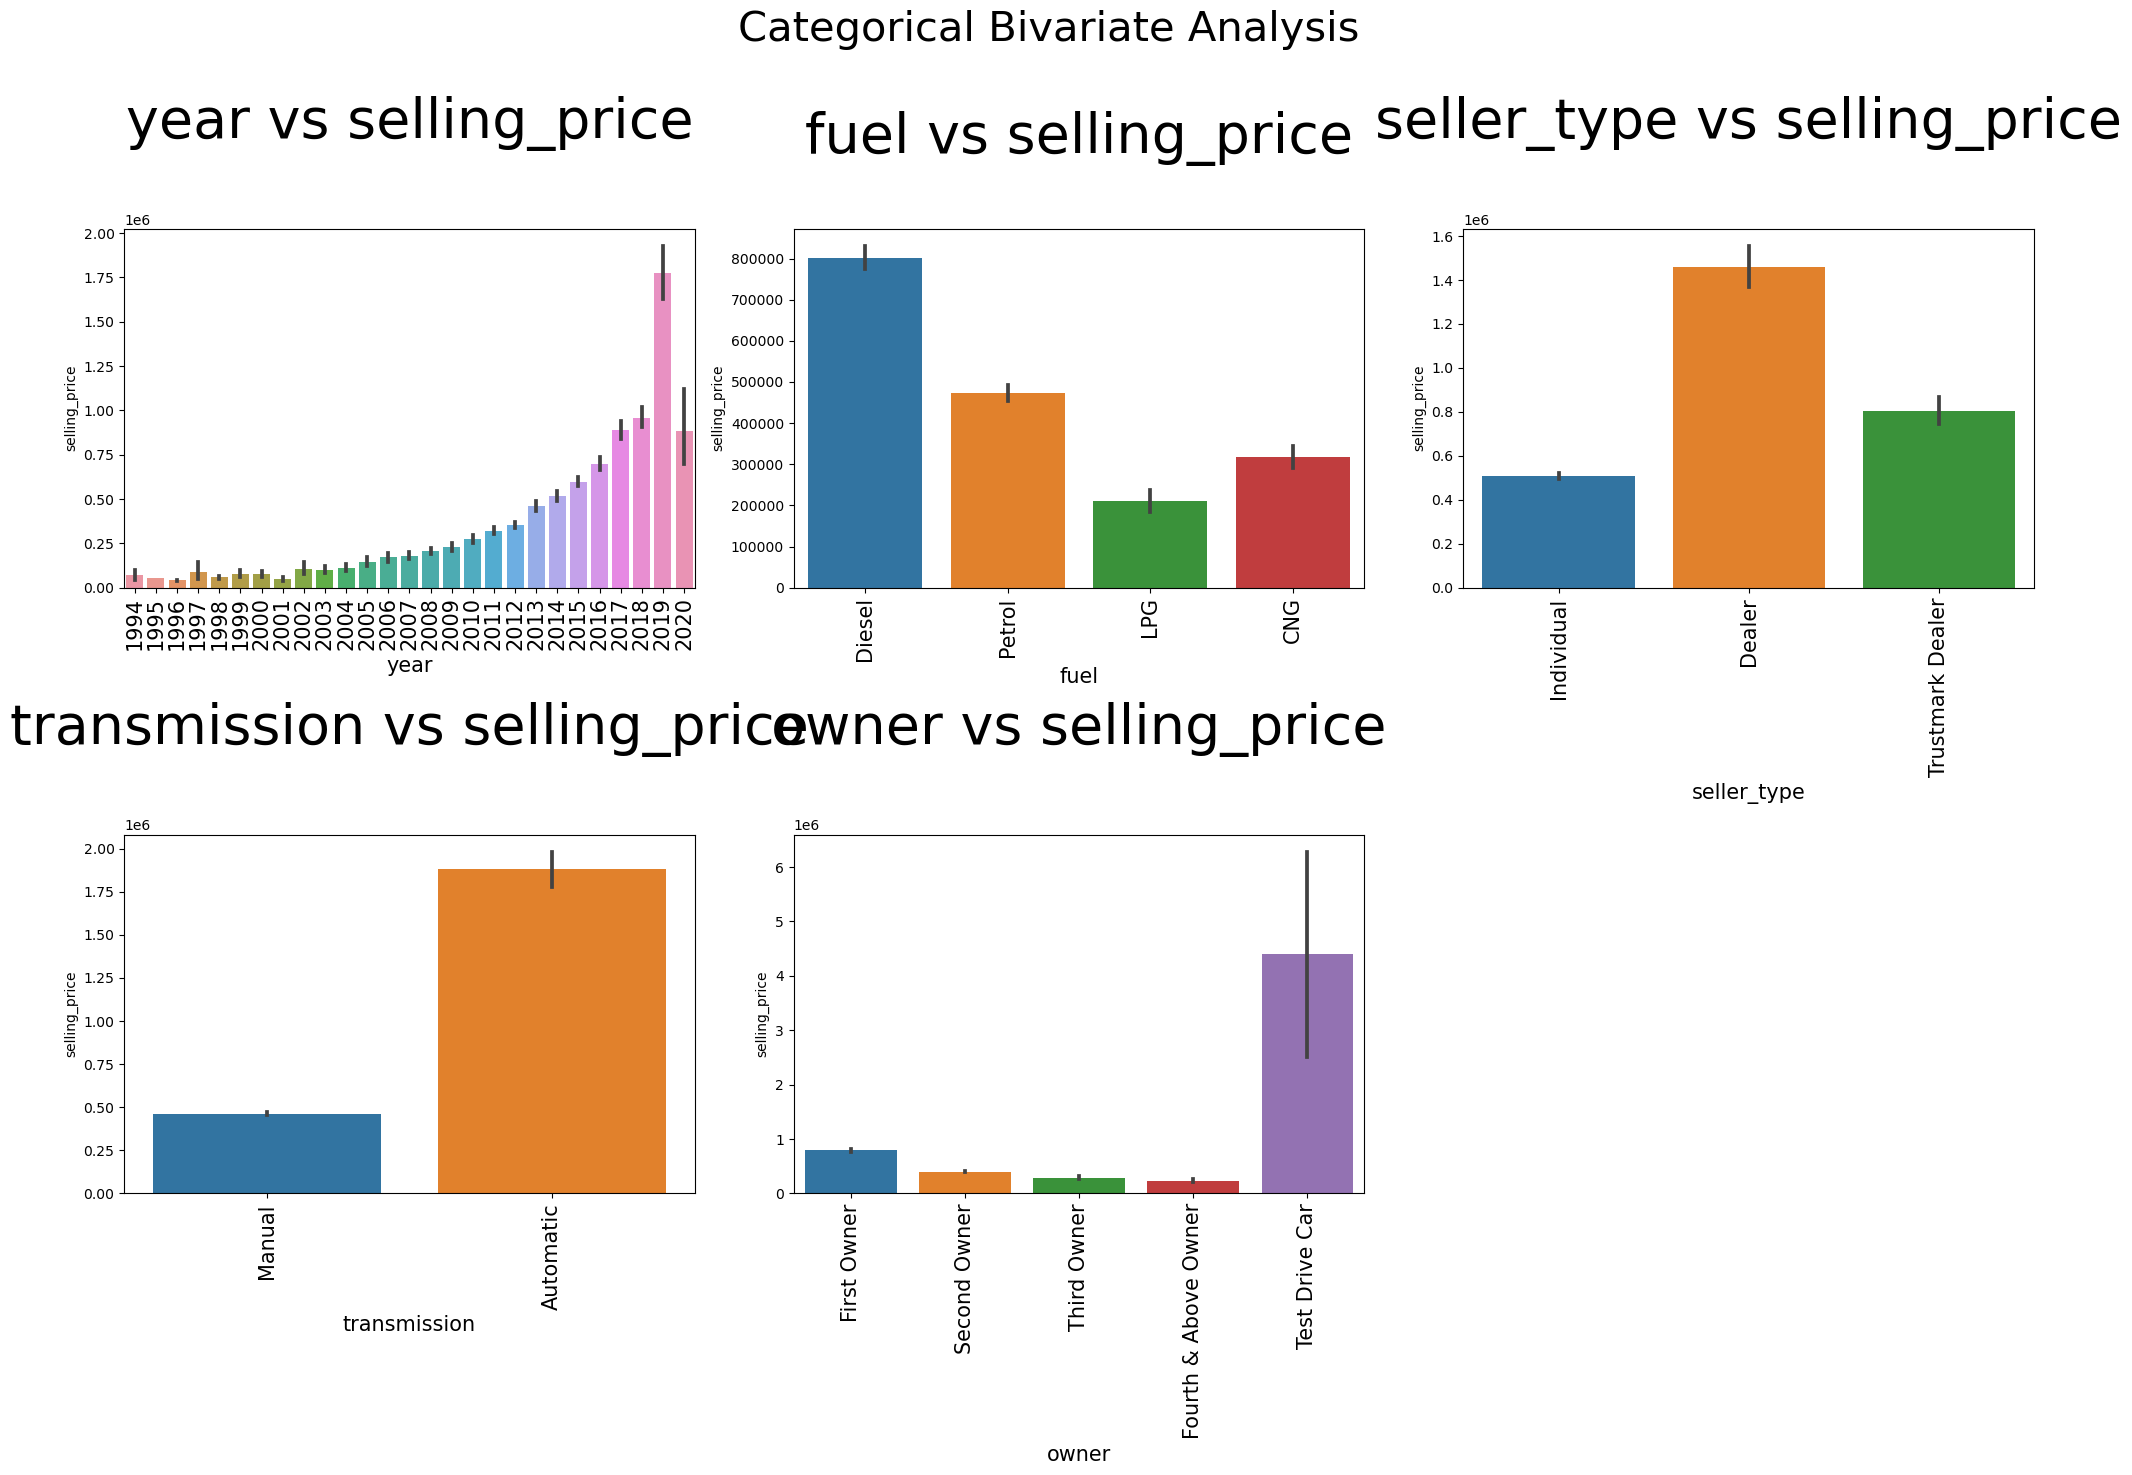

In [35]:
plt.figure(figsize = [20,15])
plt.suptitle('Categorical Bivariate Analysis\n', fontsize=30)
i=1
for col in cat_cols:
        plt.subplot(2,3,i)
        sns.barplot(x=CarData[col],y=CarData['selling_price'])
        plt.title(f'{col} vs selling_price\n', fontdict={'size':40 })
        plt.xlabel(col, size=15)
        plt.xticks(size=15, rotation=90)
        i+=1
        
        
plt.tight_layout()
plt.show()

**FINDINGS**

1. **Selling Price Increase (2015 - 2020)**: This suggests a rising trend in car prices during those years, possibly due to factors like inflation, increased demand, or changes in consumer preferences.

2. **Diesel Cars Pricing**: Diesel cars often have a higher market value due to their efficiency and longevity. This could be influenced by fuel economy and buyer preferences in certain regions.

3. **Dealer vs. Individual Seller Prices**: Dealers might maintain higher prices due to overhead costs, a reputation for reliability, offering warranties, and the ability to provide financing options, while individual sellers often price more competitively for quicker sales.

4. **Automatic vs. Manual Transmission Cars**: The preference for automatic cars can lead to higher prices. Additionally, test drive or demo cars typically retain their value well due to perceived reliability and the dealership’s brand assurance.

### Analysis of Numeric Variables

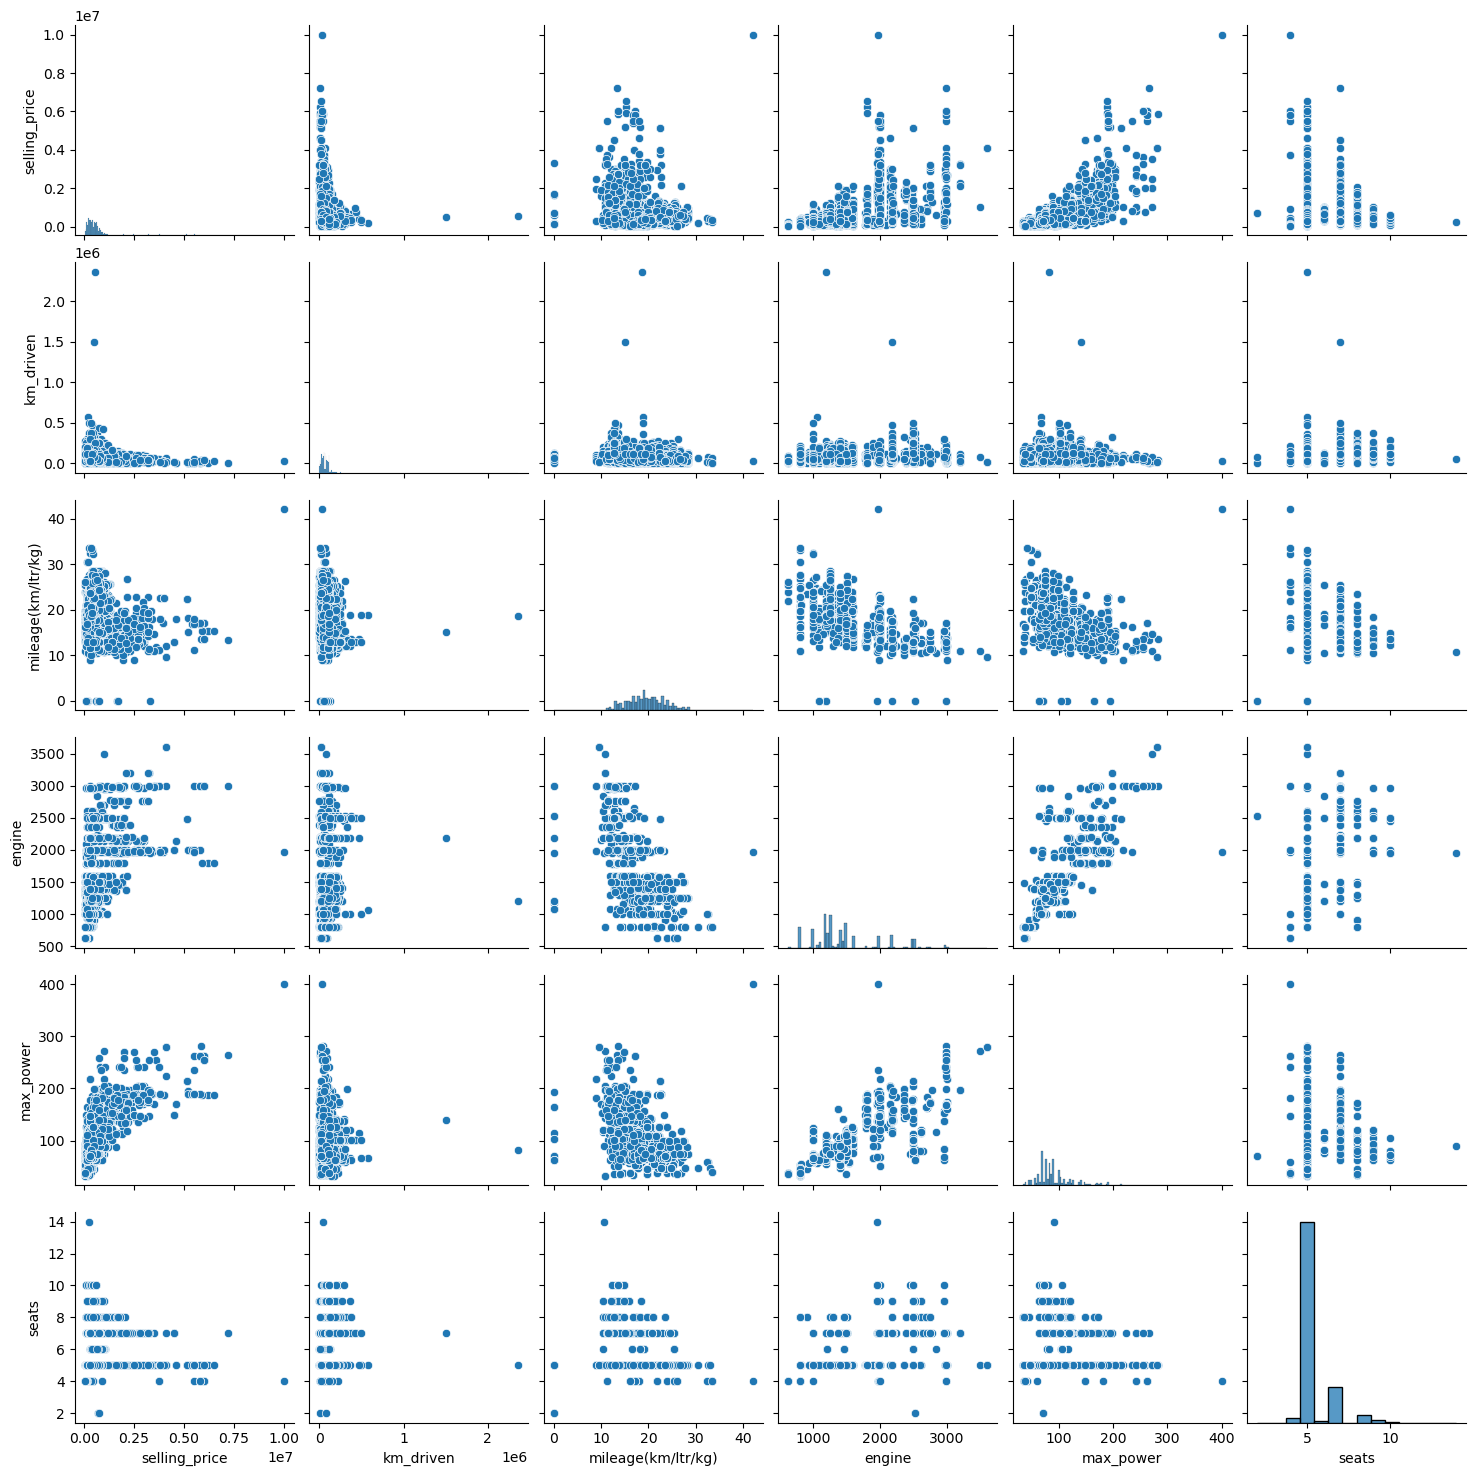

In [36]:
sns.pairplot(CarData[num_cols])
plt.show()

__Insights:__
    
    1. Engine and Max_power seems to have certain kind of correlationship.
    2. Selling_price have correlationship with max_power,engine

In [84]:
CarData["fuel"].count()

7906

In [80]:
CarData["fuel"].convert_dtypes('bool')

0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
8123    Petrol
8124    Diesel
8125    Diesel
8126    Diesel
8127    Diesel
Name: fuel, Length: 7906, dtype: string

<Axes: >

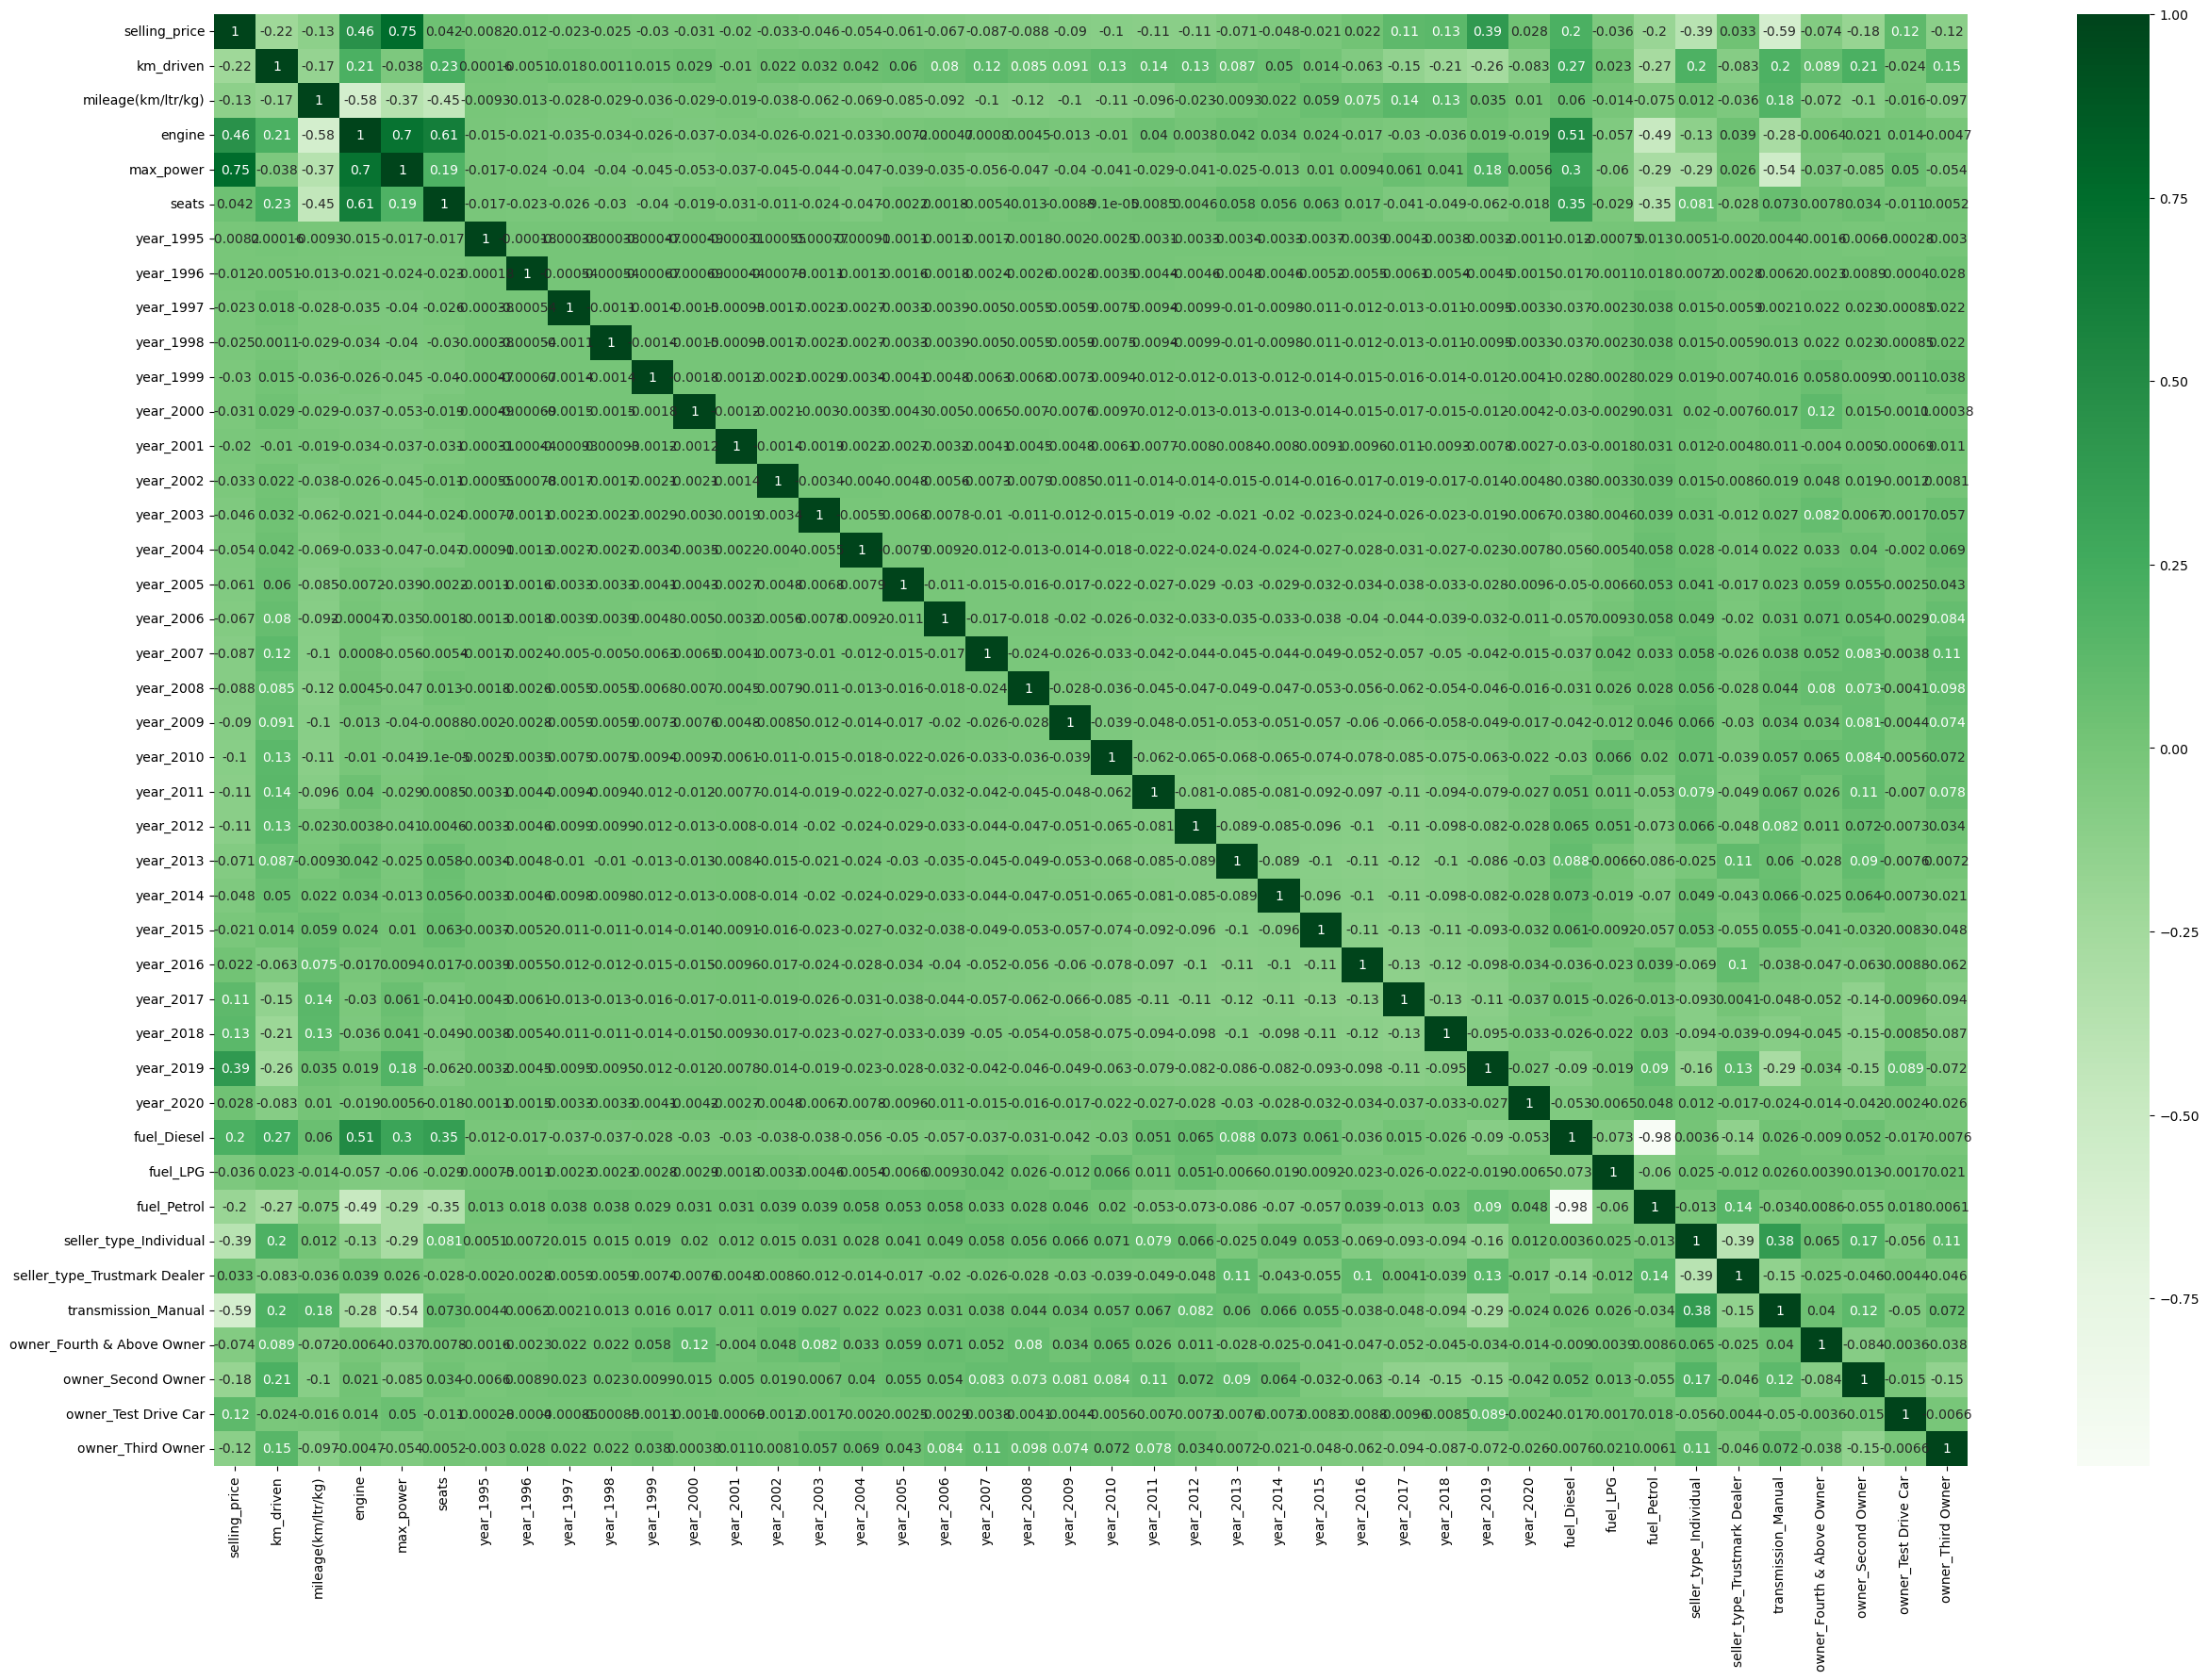

In [90]:
plt.figure(figsize = [30,20])
CarData_encoded = pd.get_dummies(CarData, drop_first=True)
sns.heatmap(CarData_encoded.corr(), cmap='Greens', annot=True)

<Axes: >

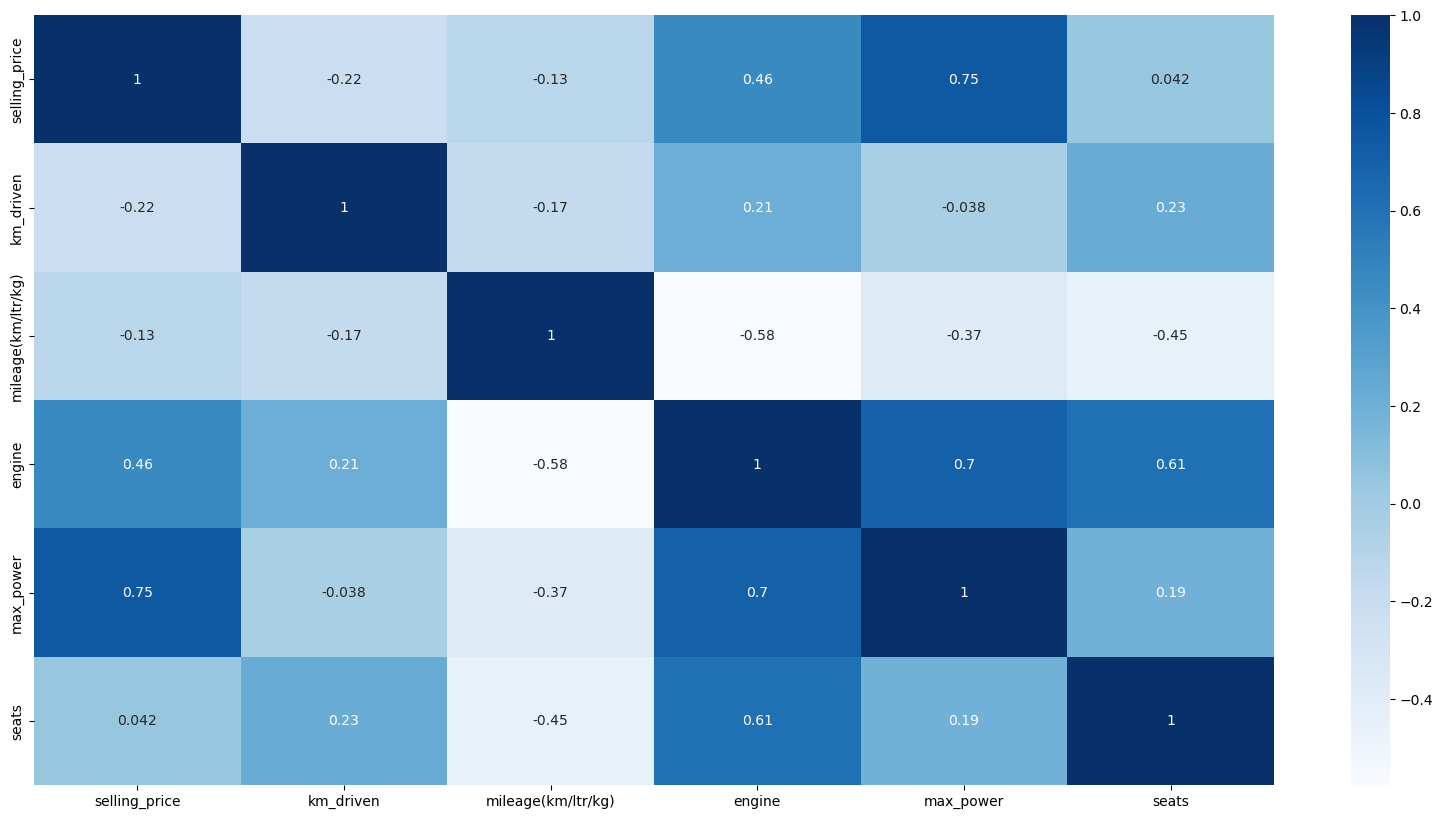

In [85]:
plt.figure(figsize = [20,10])
Cardata = CarData.select_dtypes(include=[np.number])
sns.heatmap(Cardata.corr(),cmap='Blues', annot=True)

__We created a heatmap to verify if our inferences from the pairplot were true or not, as you can see engine & max_power are highly correlated to selling_price__

## Step-3: Data Preprocessing

In [87]:
Cardata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   selling_price       7906 non-null   int64  
 1   km_driven           7906 non-null   int64  
 2   mileage(km/ltr/kg)  7906 non-null   float64
 3   engine              7906 non-null   float64
 4   max_power           7906 non-null   float64
 5   seats               7906 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 690.4 KB


In [92]:
Cardata1 = pd.get_dummies(CarData)

In [93]:
Cardata1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 7906 non-null   int64  
 1   km_driven                     7906 non-null   int64  
 2   mileage(km/ltr/kg)            7906 non-null   float64
 3   engine                        7906 non-null   float64
 4   max_power                     7906 non-null   float64
 5   seats                         7906 non-null   float64
 6   year_1994                     7906 non-null   bool   
 7   year_1995                     7906 non-null   bool   
 8   year_1996                     7906 non-null   bool   
 9   year_1997                     7906 non-null   bool   
 10  year_1998                     7906 non-null   bool   
 11  year_1999                     7906 non-null   bool   
 12  year_2000                     7906 non-null   bool   
 13  year_200

In [97]:
Cardata1.head()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_1994,year_1995,year_1996,year_1997,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,5.0,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
1,370000,120000,21.14,1498.0,103.52,5.0,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2,158000,140000,17.70,1497.0,78.00,5.0,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True
3,225000,127000,23.00,1396.0,90.00,5.0,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
4,130000,120000,16.10,1298.0,88.20,5.0,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False


__Dropping unwanted year columns__

In [99]:
Cardata1.drop(columns = Cardata1.columns.to_series()["year_1994": "year_2014"], axis=1,inplace=True)

## Step-4: Splitting Dataset into Train & Test sets

In [100]:
df_train,df_test = train_test_split(cardata1, train_size=0.7, test_size=0.3, random_state=100)

In [101]:
df_train.shape

(5534, 26)

In [102]:
df_test.shape

(2372, 26)

### Re-Scaling features : StandardScaler

In [103]:
scaler = MinMaxScaler()
scaling_cols = ['km_driven','mileage(km/ltr/kg)','engine','max_power','seats']
df_train[scaling_cols] = scaler.fit_transform(df_train[scaling_cols])
df_train.head()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1858,5150000,0.008473,0.532619,0.625168,0.494989,0.250000,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
4541,350000,0.050837,0.404762,0.292953,0.232026,0.250000,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1035,757000,0.010591,0.676190,0.209396,0.112255,0.250000,False,False,False,False,...,False,True,False,False,True,True,False,False,False,False
2109,2600000,0.029655,0.485238,0.451007,0.300109,0.250000,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
5466,45000,0.038128,0.383333,0.057718,0.011438,0.166667,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False


__Creating X & y variables__

In [104]:
y_train = df_train.pop('selling_price')
X_train = df_train

In [105]:
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1858,0.008473,0.532619,0.625168,0.494989,0.250000,False,False,False,False,True,...,True,False,False,True,False,True,False,False,False,False
4541,0.050837,0.404762,0.292953,0.232026,0.250000,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1035,0.010591,0.676190,0.209396,0.112255,0.250000,False,False,False,False,True,...,False,True,False,False,True,True,False,False,False,False
2109,0.029655,0.485238,0.451007,0.300109,0.250000,False,False,True,False,False,...,False,True,False,True,False,True,False,False,False,False
5466,0.038128,0.383333,0.057718,0.011438,0.166667,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False


## Step-5: Model Building

__Feature selection using RFE(Recursive Feature Elimination) method__

In [106]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('km_driven', True, 1),
 ('mileage(km/ltr/kg)', True, 1),
 ('engine', True, 1),
 ('max_power', True, 1),
 ('seats', True, 1),
 ('year_2015', True, 1),
 ('year_2016', True, 1),
 ('year_2017', True, 1),
 ('year_2018', True, 1),
 ('year_2019', True, 1),
 ('year_2020', True, 1),
 ('fuel_CNG', True, 1),
 ('fuel_Diesel', True, 1),
 ('fuel_LPG', True, 1),
 ('fuel_Petrol', True, 1),
 ('seller_type_Dealer', True, 1),
 ('seller_type_Individual', True, 1),
 ('seller_type_Trustmark Dealer', True, 1),
 ('transmission_Automatic', True, 1),
 ('transmission_Manual', True, 1),
 ('owner_First Owner', True, 1),
 ('owner_Fourth & Above Owner', True, 1),
 ('owner_Second Owner', True, 1),
 ('owner_Test Drive Car', True, 1),
 ('owner_Third Owner', True, 1)]

In [108]:
final_cols = X_train.columns[rfe.support_]
final_cols

Index(['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats',
       'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019',
       'year_2020', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [109]:
X_train = X_train[final_cols]
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1858,0.008473,0.532619,0.625168,0.494989,0.250000,False,False,False,False,True,...,True,False,False,True,False,True,False,False,False,False
4541,0.050837,0.404762,0.292953,0.232026,0.250000,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1035,0.010591,0.676190,0.209396,0.112255,0.250000,False,False,False,False,True,...,False,True,False,False,True,True,False,False,False,False
2109,0.029655,0.485238,0.451007,0.300109,0.250000,False,False,True,False,False,...,False,True,False,True,False,True,False,False,False,False
5466,0.038128,0.383333,0.057718,0.011438,0.166667,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False


In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5534 entries, 1858 to 5803
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   km_driven                     5534 non-null   float64
 1   mileage(km/ltr/kg)            5534 non-null   float64
 2   engine                        5534 non-null   float64
 3   max_power                     5534 non-null   float64
 4   seats                         5534 non-null   float64
 5   year_2015                     5534 non-null   bool   
 6   year_2016                     5534 non-null   bool   
 7   year_2017                     5534 non-null   bool   
 8   year_2018                     5534 non-null   bool   
 9   year_2019                     5534 non-null   bool   
 10  year_2020                     5534 non-null   bool   
 11  fuel_CNG                      5534 non-null   bool   
 12  fuel_Diesel                   5534 non-null   bool   
 13  fuel_

### Model Building

In [113]:
X_train.dtypes

km_driven                       float64
mileage(km/ltr/kg)              float64
engine                          float64
max_power                       float64
seats                           float64
year_2015                          bool
year_2016                          bool
year_2017                          bool
year_2018                          bool
year_2019                          bool
year_2020                          bool
fuel_CNG                           bool
fuel_Diesel                        bool
fuel_LPG                           bool
fuel_Petrol                        bool
seller_type_Dealer                 bool
seller_type_Individual             bool
seller_type_Trustmark Dealer       bool
transmission_Automatic             bool
transmission_Manual                bool
owner_First Owner                  bool
owner_Fourth & Above Owner         bool
owner_Second Owner                 bool
owner_Test Drive Car               bool
owner_Third Owner                  bool
